<a href="https://colab.research.google.com/github/alishermutalov/ML-learning/blob/ml/05_ml_05_amaliyot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 5-MODUL. Machine Learning

### Portfolio uchun vazifa: Toshkent shahrida uylarning narxini aniqlash.

Ushbu amaliyotda sizning vazifangiz berilgan ma`lumotlar asosida Toshkent shahridagi uylarning narxini aniqlash.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/housing_data_08-02-2021.csv')
df.head()

,location,district,rooms,size,level,max_levels,price
0,"город Ташкент, Юнусабадский район, Юнусабад 8-...",Юнусабадский,3,57,4,4,52000
1,"город Ташкент, Яккасарайский район, 1-й тупик ...",Яккасарайский,2,52,4,5,56000
2,"город Ташкент, Чиланзарский район, Чиланзар 2-...",Чиланзарский,2,42,4,4,37000
3,"город Ташкент, Чиланзарский район, Чиланзар 9-...",Чиланзарский,3,65,1,4,49500
4,"город Ташкент, Чиланзарский район, площадь Актепа",Чиланзарский,3,70,3,5,55000


# Ustunlar ta'rifi
- `location` - sotilayotgan uy manzili
- `district` - uy joylashgan tuman
- `rooms` - xonalar soni
- `size` - uy maydoni (kv.m)
- `level` - uy joylashgan qavat
- `max_levels` - ja'mi qavatlar soni
- `price` - uy narxi

## Vazifani CRSIP-DM Metolodgiyasi yordamida bajaring.
<img src="https://i.imgur.com/dzZnnYi.png" alt="CRISP-DM" width="800"/>

In [ ]:
df.describe()

,rooms,level,max_levels
count,7565.000000,7565.000000,7565.000000
mean,2.625644,3.699273,6.038202
std,1.085201,2.237275,2.613271
min,1.000000,1.000000,1.000000
25%,2.000000,2.000000,4.000000
50%,3.000000,3.000000,5.000000
75%,3.000000,5.000000,9.000000
max,10.000000,19.000000,25.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7565 entries, 0 to 7564
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   location    7565 non-null   object
 1   district    7565 non-null   object
 2   rooms       7565 non-null   int64 
 3   size        7565 non-null   object
 4   level       7565 non-null   int64 
 5   max_levels  7565 non-null   int64 
 6   price       7565 non-null   object
dtypes: int64(3), object(4)
memory usage: 413.8+ KB


In [ ]:
df.isnull().sum()

,0
location,0
district,0
rooms,0
size,0
level,0
max_levels,0
price,0


Yuqorida ko'rishimiz mumkinki, barcha ma'lumotlar kiritilgan, null qiymatlar yo'q. Keyingi jarayon, ma'lumotlarning bir biriga bog'liqligini tekshirish.

In [ ]:
df['price'].min()

'1000'

In [ ]:
df['price'].max()

'Договорная'

In [ ]:
new_df = df[df['price']!='Договорная']
new_df

,location,district,rooms,size,level,max_levels,price
0,"город Ташкент, Юнусабадский район, Юнусабад 8-...",Юнусабадский,3,57,4,4,52000
1,"город Ташкент, Яккасарайский район, 1-й тупик ...",Яккасарайский,2,52,4,5,56000
2,"город Ташкент, Чиланзарский район, Чиланзар 2-...",Чиланзарский,2,42,4,4,37000
3,"город Ташкент, Чиланзарский район, Чиланзар 9-...",Чиланзарский,3,65,1,4,49500
4,"город Ташкент, Чиланзарский район, площадь Актепа",Чиланзарский,3,70,3,5,55000
...,...,...,...,...,...,...,...
7560,"город Ташкент, Яшнободский район, Городок Авиа...",Яшнободский,1,38,5,5,24500
7561,"город Ташкент, Яшнободский район, 1-й проезд А...",Яшнободский,2,49,1,4,32000
7562,"город Ташкент, Шайхантахурский район, Зульфиях...",Шайхантахурский,2,64,3,9,40000
7563,"город Ташкент, Мирзо-Улугбекский район, Буюк И...",Мирзо-Улугбекский,1,18,1,4,11000


In [ ]:
new_df['price'] = new_df.price.astype('float64')

<ipython-input-112-573580b3c606>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['price'] = new_df.price.astype('float64')


In [ ]:
new_df.price

,price
0,52000.0
1,56000.0
2,37000.0
3,49500.0
4,55000.0
...,...
7560,24500.0
7561,32000.0
7562,40000.0
7563,11000.0


In [ ]:
print(new_df['price'].max())
print(new_df['price'].min())

52000000.0
2.0


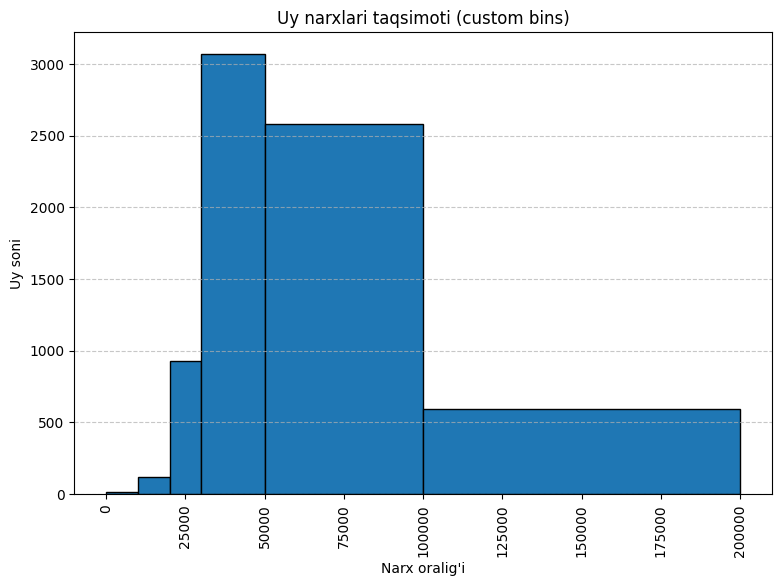

In [ ]:
plt.figure(figsize=(9,6))
custom_bins = [0, 10000, 20000, 30000, 50000,100000,200000]
plt.hist(new_df['price'], bins=custom_bins, edgecolor='black')
plt.title('Uy narxlari taqsimoti (custom bins)')
plt.xlabel('Narx oralig\'i')
plt.ylabel('Uy soni')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=90)
plt.show()

In [ ]:
print(new_df.dtypes)
print(new_df.isnull().sum())

location       object
district       object
rooms           int64
size           object
level           int64
max_levels      int64
price         float64
dtype: object
location      0
district      0
rooms         0
size          0
level         0
max_levels    0
price         0
dtype: int64


In [ ]:
new_df.drop(new_df[new_df['size'].str.startswith('Площадьземли')].index, inplace=True)

<ipython-input-117-27b05b6bddc9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.drop(new_df[new_df['size'].str.startswith('Площадьземли')].index, inplace=True)


In [ ]:
new_df['size'] = new_df['size'].astype('float64')

<ipython-input-118-7324abc49673>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['size'] = new_df['size'].astype('float64')


In [ ]:
new_df.dtypes

,0
location,object
district,object
rooms,int64
size,float64
level,int64
max_levels,int64
price,float64


In [ ]:
districts = new_df.district.unique().reshape(-1, 1)
districts

array([['Юнусабадский'],
       ['Яккасарайский'],
       ['Чиланзарский'],
       ['Учтепинский'],
       ['Мирзо-Улугбекский'],
       ['Яшнободский'],
       ['Мирабадский'],
       ['Шайхантахурский'],
       ['Олмазорский'],
       ['Сергелийский'],
       ['Янгихаётский'],
       ['Бектемирский']], dtype=object)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
encoded_districts = encoder.fit_transform(new_df[['district']])
encoded_districts.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(data=new_df, x='district')
plt.title('Toshkent shahrida joylashgan uylar soni')
plt.xlabel('Tuman')
plt.ylabel('Uy soni')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=90)
plt.show()

In [ ]:
dist_df = pd.DataFrame(encoded_districts.toarray(), columns=[district[0] for district in districts])
dist_df

,Юнусабадский,Яккасарайский,Чиланзарский,Учтепинский,Мирзо-Улугбекский,Яшнободский,Мирабадский,Шайхантахурский,Олмазорский,Сергелийский,Янгихаётский,Бектемирский
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7460,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7461,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7462,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7463,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
dist_df.shape

(7465, 12)

In [ ]:
new_df.shape

,0
location,0
district,0
rooms,0
size,0
level,0
max_levels,0
price,0


In [ ]:
new_df.reset_index(drop=True, inplace=True)
dist_df.reset_index(drop=True, inplace=True)


In [ ]:
print(new_df.shape)
print(dist_df.shape)

(7465, 7)
(7465, 12)


In [ ]:
X = pd.concat([new_df, dist_df], axis=1)
y = X['price'].copy()
X.drop(['location', 'district', 'price'], axis=1, inplace=True)
X.head(3)

,rooms,size,level,max_levels,Юнусабадский,Яккасарайский,Чиланзарский,Учтепинский,Мирзо-Улугбекский,Яшнободский,Мирабадский,Шайхантахурский,Олмазорский,Сергелийский,Янгихаётский,Бектемирский
0,3,57.0,4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2,52.0,4,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2,42.0,4,4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
print("X uzunligi:", len(X))
print("y uzunligi:", len(y))


X uzunligi: 7465
y uzunligi: 7465


In [ ]:
from  sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
LR_model = LinearRegression()
LR_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
y_predicted = LR_model.predict(X_test)

print("RMSE:", np.sqrt(mean_squared_error(y_test, y_predicted)))
print("MAE:", mean_absolute_error(y_test, y_predicted))

RMSE: 1366742.755611274
MAE: 67771.32084531563


In [ ]:
from sklearn.ensemble import RandomForestRegressor
RF_model = RandomForestRegressor(n_estimators=10, random_state=42)
RF_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=42)

In [ ]:
y_predicted_rf = RF_model.predict(X_test)

print("RMSE:", np.sqrt(mean_squared_error(y_test, y_predicted_rf)))
print("MAE:", mean_absolute_error(y_test, y_predicted_rf))

RMSE: 1376309.7256395572
MAE: 61875.54129953851


In [ ]:
import joblib
joblib.dump(RF_model, 'housin_price_model.pkl')

['housin_price_model.pkl']